In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('filtered_cleaned_data.csv')

In [3]:
df.head()

,Rating,Review
0,5,pantai buatan kuala langsa berada kawasan pesi...
1,4,main kesinicm warna airnya coklat
2,3,oke bagus kok
3,1,andai dikelola baik menjadi destinasi menarik ...
4,5,bukan pantai disini tuh area wisata hutan mang...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34065 entries, 0 to 34064
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  34065 non-null  int64 
 1   Review  32684 non-null  object
dtypes: int64(1), object(1)
memory usage: 532.4+ KB


In [10]:
df.dropna(subset=['Review'], inplace=True)
df.drop(df[df['Review'].apply(lambda x: len(str(x).split()) < 6)].index, inplace=True)
df.drop(df[df["Rating"] == 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29349 entries, 0 to 34064
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  29349 non-null  int64 
 1   Review  29349 non-null  object
dtypes: int64(1), object(1)
memory usage: 687.9+ KB


(<Axes: ylabel='count'>,
 Rating
 5    18205
 4     7395
 3     2508
 1      674
 2      567
 Name: count, dtype: int64)

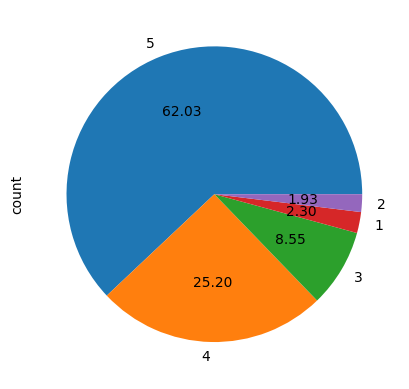

In [11]:
df['Rating'].value_counts().plot.pie(autopct="%.2f"), df['Rating'].value_counts()

In [23]:
df['Rating'].value_counts(), df.head()

(Rating
 5    18205
 4     7395
 3     2508
 1      674
 2      567
 Name: count, dtype: int64,
    Rating                                             Review
 0       5  sangat asri kalau melihat sunset vibe diatas b...
 1       4  dermaga pelabuhan tradisional dapatka pemandan...
 2       5  merupakan tugu dibangun mengenang proklamasi k...
 3       5  photogenic kalo singgah disini kalo foto tugu ...
 4       5  one of the most respected figures for his grea...)

In [24]:
reduce_size_to = 567
df_1 = df[df['Rating'] == 1]
df_2 = df[df['Rating'] == 2]
df_3 = df[df['Rating'] == 3]
df_4 = df[df['Rating'] == 4]
df_5 = df[df['Rating'] == 5]

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 81 to 29302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  674 non-null    int64 
 1   Review  674 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [27]:
from sklearn.utils import resample
df_1_downsampled = resample(df_1, replace=False, n_samples=reduce_size_to, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=reduce_size_to, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=reduce_size_to, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=reduce_size_to, random_state=42)

In [28]:
df_balanced = pd.concat([df_1_downsampled, df_2, df_3_downsampled, df_4_downsampled, df_5_downsampled])

In [34]:
df_balanced.head(), df_balanced['Rating'].value_counts()

(       Rating                                             Review
 26362       1  pedagang jagain dong pasangan muda mudinya aco...
 12598       1  lokasi masuk loket wisata belok kiri mentok je...
 26757       1  gila tempaynya kok buruk banget sekarang dulu ...
 23685       1  tempat banjir masuk kedalam tetap bayar mulai ...
 16298       1  gak asikjauh masuk jalanan gak bagus parkir la...,
 Rating
 1    567
 2    567
 3    567
 4    567
 5    567
 Name: count, dtype: int64)